<a href="https://colab.research.google.com/github/alexandrecassimiro/VD/blob/main/Trabalho_Final_VD_Nuvem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

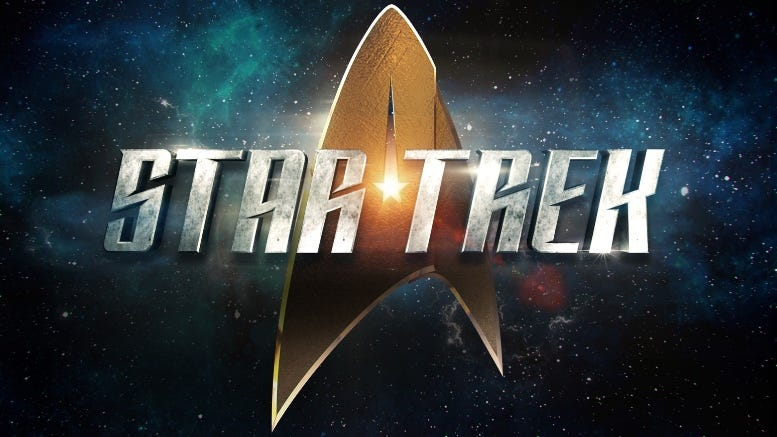
# Neste código: 


1. Acessa arquivo local gerando dataframe
2. Explora dataframe
3. Interação com dados para filtrar arquivo
4. Gera nuvem

In [ ]:
#@title Carregar dataframe com arquivo zipado

import zipfile
import json
import pandas as pd
with zipfile.ZipFile('all_series_lines.zip') as z:
  with z.open('all_series_lines.json') as f:
    all_series_lines = json.load(f)


# Transformar o dicionário em um DataFrame
df = pd.DataFrame([(series_name, episode_number, character, line) for series_name, episodes in all_series_lines.items()
                   for episode_number, lines in episodes.items()
                   for character, lines_list in lines.items()
                   for line in lines_list],
                  columns=['series_name', 'episode_number', 'character', 'line'])
df.series_name.unique()

array(['ENT', 'DS9', 'TOS', 'TAS', 'TNG', 'VOY'], dtype=object)

In [92]:
#@title filtros precarregados  { display-mode: "form" }
#@markdown ## Campo de seleção


Série = "Deep Space Nine" #@param ["Deep Space Nine", "Enterprise", "The Animated Serie", "The New Generation", "The Original Serie", "Voyager"]
epi = "episode 0" #@param ["episode 0", "episode 1", "episode 2", ""] {allow-input: true}
pers = "MARK" #@param ["JANEWAY", "MARK", "TORRES", "QUARK", "SISKO"]

#@markdown ### Quantidade de palavras
MAX = 1000 #@param ["10", "100", "1000"] {type:"raw"}

#@markdown ## Acessibilidade.
#@markdown ## Melhorar a visualização conforme necessidade especial do usuário.
#@markdown ## Atenção!!!. Para falicitar para daltonismo, escolha cor de fundo #F0F0F0 e cor das palavras VIRIDIS.
#@markdown ### Cor de fundo 
CORF = "#F0F0F0" #@param ["BLACK", "WHITE", "GREEN", "#F0F0F0"]
#@markdown ### Cor das palavras
CORP = "Auto" #@param ["black", "viridis", "Greens", "cool", "Auto"]




cfnd = CORF
cplv = CORP



match Série:
    case 'Enterprise':
        seriado = "ENT"
    case 'Deep Space Nine':
        seriado = "DS9"
    case 'The Original Serie':
        seriado = "TOS"
    case 'The Animated Serie':
        seriado = "TAS"
    case 'The New Generation':
        seriado = "TNG"
    case 'Voyager':
        seriado = "VOY"
    # case '_':
    #     print("Entre com a série")
# 'ENT', 'DS9', 'TOS', 'TAS', 'TNG', 'VOY

print(Série)
print(seriado)
print(epi)
print(pers)
print(MAX)
print(CORF)
print(CORP)

Deep Space Nine
DS9
episode 0
MARK
1000
#F0F0F0
Auto


In [ ]:
# Acessando as linhas conforme filtro recebido
lines = all_series_lines[seriado][epi][pers]
#print(lines)


In [ ]:
# Convertendo as linhas em um dicionário
lines_dict = {}
for i, line in enumerate(lines):
    lines_dict[str(i+1)] = line


In [ ]:
# Convertendo o dicionário em um dataframe
df = pd.DataFrame.from_dict(lines_dict, orient='index', columns=['line'])

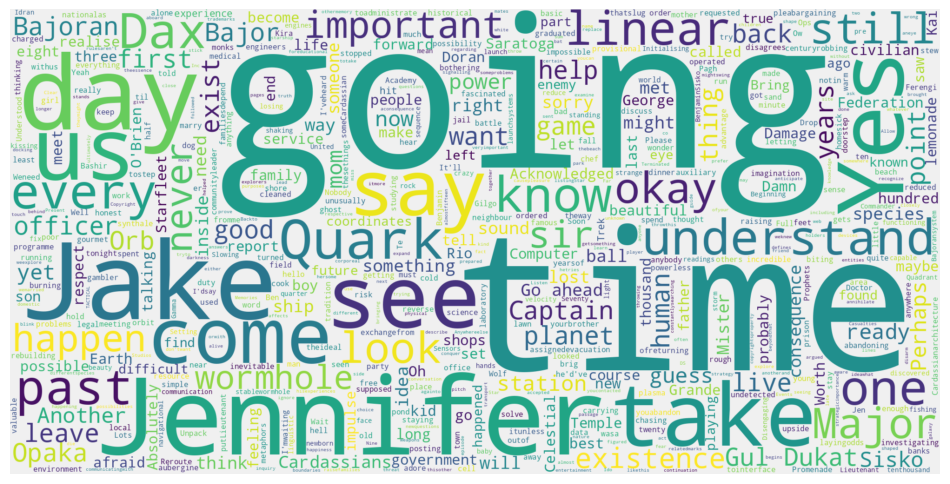

In [93]:
#@title THE CLOUD!
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Gerando a nuvem de palavras

if CORP == 'Auto':
      wordcloud = WordCloud(
      contour_width=2000, 
      width=2000, 
      height=1000, 
      background_color=CORF, 
      max_words=MAX,
      # prefer_horizontal= 0,
      ).generate(' '.join(df['line']))
else:
  wordcloud = WordCloud(
      contour_width=2000, 
      width=2000, 
      height=1000, 
      background_color=CORF, 
      colormap=CORP,
      max_words=MAX,
      # prefer_horizontal= 0,
      ).generate(' '.join(df['line']))

# (class) WordCloud
#  (font_path: Any | None = None,
#   width: int = 400, 
#   height: int = 200,
#   margin: int = 2,
#   ranks_only: Any | None = None,
#   prefer_horizontal: float = 0.9,
#   mask: Any | None = None,
#   scale: int = 1,
#   color_func: Any | None = None,
#   max_words: int = 200, min_font_size: int = 4, stopwords: Any | None = None, random_state: Any | None = None,
#   background_color: str = 'black', max_font_size: Any | None = None, font_step: int = 1, mode: str = "RGB", relative_scaling: str = 'auto', regexp: Any | None = None,
#   collocations: bool = True, colormap: Any | None = None, normalize_plurals: bool = True, contour_width: int = 0, contour_color: str = 'black', 
#   repeat: bool = False, include_numbers: bool = False, min_word_length: int = 0, collocation_threshold: int = 30)


# Exibindo a nuvem
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
# text = open(path.join(d, 'alice.txt')).read()


# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
# alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))
# alice_mask = np.array(Image.open(path.join(d, "/content/iconINV.png"))) #com essa dá um pouco certo
alice_mask = np.array(Image.open(path.join(d, "/content/ncc1701inc.jpg"))) #com essa dá um pouco certo

stopwords = set(STOPWORDS)
stopwords.add("said")

# wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
#                stopwords=stopwords, contour_width=3, contour_color='steelblue')

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=alice_mask, max_font_size=200,
                      min_font_size=1).generate(line)
# wordcloud = WordCloud(contour_width=2000, width=1600, height=800, background_color="black", max_words=MAX,mask=alice_mask).generate(' '.join(df['line']))
# generate word cloud
# wc.generate(line)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)
# wordcloud.to_file("airbnb_summary_wordcloud.png")


# # store to file
# wc.to_file(path.join(d, "/content/bottom2.png"))


# # show
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
# plt.figure()
# plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.axis("off")
# plt.show()

NameError: ignored